In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

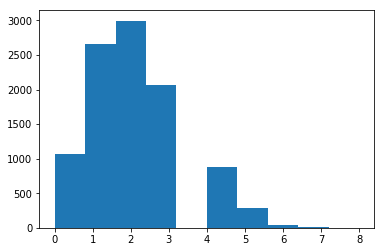

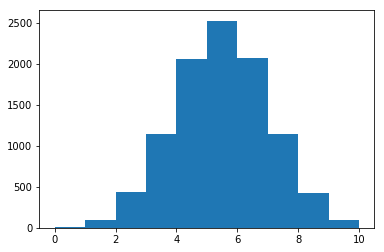

sample1 mean : 1.948
sample1 standard deviation: 1.20884076701607
sample2 mean: 4.924
sample2 standard deviation: 1.5837373519621238
2.9760000000000004


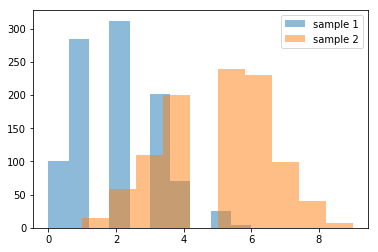

In [49]:
#true populations
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

plt.hist(pop1)
plt.show()
plt.hist(pop2)
plt.show()

#sample populations
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

#means and standard deviations
print('sample1 mean : ' + str(sample1.mean()))
print('sample1 standard deviation: ' + str(sample1.std()))
print('sample2 mean: ' + str(sample2.mean()))
print('sample2 standard deviation: ' + str(sample2.std()))

# Compute the difference between the two sample means.
diff=sample2.mean()-sample1.mean()
print(diff)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

Expectation: For the 1000 sample size, for both samples, I expect the means to be closer to the true probability of success (p in binomial function) and expect the standard deviation to be larger. I expect the opposite to be true for a sample size of 20.

sample1_1000 mean : 2.066
sample1_1000 standard deviation: 1.3159194504224032
sample2_1000 mean: 5.084
sample2_1000 standard deviation: 1.5770047558583962


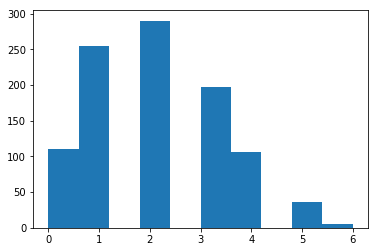

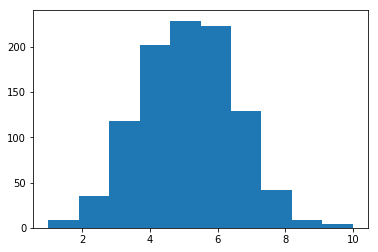



sample1_20 mean : 2.0
sample1_20 standard deviation: 1.2649110640673518
sample2_20 mean: 5.35
sample2_20 standard deviation: 1.5256146302392357


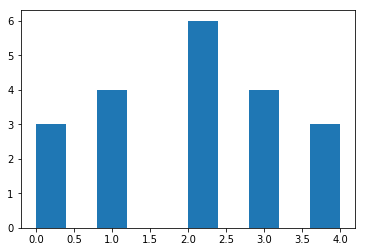

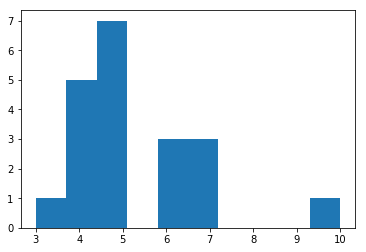

In [32]:
# 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

# A. What do I expect to happen?
print('Expectation: For the 1000 sample size, for both samples, I expect the means to be closer to the true probability of success (p in binomial function) and expect the standard deviation to be larger. I expect the opposite to be true for a sample size of 20.\n')

# B. What happens?

# sample size of 1000
sample1_1000 = np.random.choice(pop1, 1000, replace=True)
sample2_1000 = np.random.choice(pop2, 1000, replace=True)
print('sample1_1000 mean : ' + str(sample1_1000.mean()))
print('sample1_1000 standard deviation: ' + str(sample1_1000.std()))
print('sample2_1000 mean: ' + str(sample2_1000.mean()))
print('sample2_1000 standard deviation: ' + str(sample2_1000.std()))
plt.hist(sample1_1000)
plt.show()
plt.hist(sample2_1000)
plt.show()

print('\n')

# sample size of 20
sample1_20 = np.random.choice(pop1, 20, replace=True)
sample2_20 = np.random.choice(pop2, 20, replace=True)
print('sample1_20 mean : ' + str(sample1_20.mean()))
print('sample1_20 standard deviation: ' + str(sample1_20.std()))
print('sample2_20 mean: ' + str(sample2_20.mean()))
print('sample2_20 standard deviation: ' + str(sample2_20.std()))
plt.hist(sample1_20)
plt.show()
plt.hist(sample2_20)
plt.show()

In [45]:
# 3. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

#true populations
pop3 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

# samples
sample3 = np.random.choice(pop3, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)
print('sample3 mean : ' + str(sample3.mean()))
print('sample3 standard deviation: ' + str(sample3.std()))
print('sample2 mean: ' + str(sample2.mean()))
print('sample2 standard deviation: ' + str(sample2.std()))
diff=sample2.mean()-sample3.mean()
print(diff)

size = np.array([len(sample3), len(sample2)])
sd = np.array([sample3.std(), sample2.std()])

diff_se = (sum(sd**2/size)) ** 0.5

#T-value = difference between between means divided by difference between standard error
print('T-value is: ' + str(diff/diff_se))

#to calculate t_value and p_value
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample3, equal_var=False))
print('\nOne way to interpret a t-value is as the number of standard errors worth of space separating the group means. A t-value of 2 would indicate that the means are two standard errors apart.\n')
print('The p-value associated with a t-test indicates the likelihood of getting a difference this large or larger in the samples if the populations were not different. The smaller the p-value, the more likely the difference we see in the samples meaningfully reflects the populations. The p-value in the test you did above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population and not due to variability in the samples.')

print('\n')
# Part B of question that involves new population with .4 probability of success
#true population
pop4 = np.random.binomial(10, 0.4, 10000)

# new sample
sample4 = np.random.choice(pop4, 100, replace=True)
print('sample4 mean : ' + str(sample4.mean()))
print('sample4 standard deviation: ' + str(sample4.std()))
diff_2=sample2.mean()-sample4.mean()
print(diff_2)

size_2 = np.array([len(sample4), len(sample2)])
sd_2 = np.array([sample4.std(), sample2.std()])

diff_se_2 = (sum(sd_2**2/size_2)) ** 0.5

#T-value = difference between between means divided by difference between standard error
print('New T-value is: ' + str(diff_2/diff_se_2))

#to calculate t_value and p_value
print(ttest_ind(sample2, sample4, equal_var=False))

sample3 mean : 2.9
sample3 standard deviation: 1.4798648586948742
sample2 mean: 4.79
sample2 standard deviation: 1.5250901612691625
1.8900000000000001
T-value is: 8.89384683508445
Ttest_indResult(statistic=8.8492658684595, pvalue=4.956599618152775e-16)

One way to interpret a t-value is as the number of standard errors worth of space separating the group means. A t-value of 2 would indicate that the means are two standard errors apart.

The p-value associated with a t-test indicates the likelihood of getting a difference this large or larger in the samples if the populations were not different. The smaller the p-value, the more likely the difference we see in the samples meaningfully reflects the populations. The p-value in the test you did above is really small, so we can be fairly confident that the difference in means we see is due to a real difference in the population and not due to variability in the samples.


sample4 mean : 4.06
sample4 standard deviation: 1.4478950238190615
0.

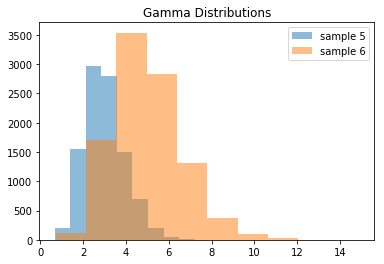

sample6 mean : 4.959292428743882
sample6 standard deviation: 1.6353264246985955
sample5 mean: 3.0360065234292586
sample5 standard deviation: 0.9460398128572199
Ttest_indResult(statistic=32.17629611229531, pvalue=1.3339411860447412e-175)


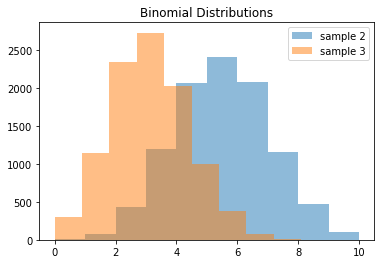

sample3 mean : 3.002
sample3 standard deviation: 1.4317807094663624
sample2 mean: 5.005
sample2 standard deviation: 1.5789157672276253
Ttest_indResult(statistic=29.702548326088117, pvalue=1.1986805765665159e-160)


In [60]:
# 3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?
#true populations
pop5 = np.random.gamma(10, 0.3, 10000)
pop6 = np.random.gamma(10, 0.5, 10000)

plt.hist(pop5, alpha=0.5, label='sample 5') 
plt.hist(pop6, alpha=0.5, label='sample 6') 
plt.legend(loc='upper right') 
plt.title('Gamma Distributions')
plt.show()

# samples
sample6 = np.random.choice(pop6, 1000, replace=True)
sample5 = np.random.choice(pop5, 1000, replace=True)
print('sample6 mean : ' + str(sample6.mean()))
print('sample6 standard deviation: ' + str(sample6.std()))
print('sample5 mean: ' + str(sample5.mean()))
print('sample5 standard deviation: ' + str(sample5.std()))

#to calculate t_value and p_value
from scipy.stats import ttest_ind
print(ttest_ind(sample6, sample5, equal_var=False))


#true populations
pop3 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

plt.hist(pop2, alpha=0.5, label='sample 2') 
plt.hist(pop3, alpha=0.5, label='sample 3') 
plt.legend(loc='upper right') 
plt.title('Binomial Distributions')
plt.show()

# samples
sample3 = np.random.choice(pop3, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)
print('sample3 mean : ' + str(sample3.mean()))
print('sample3 standard deviation: ' + str(sample3.std()))
print('sample2 mean: ' + str(sample2.mean()))
print('sample2 standard deviation: ' + str(sample2.std()))

#to calculate t_value and p_value
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample3, equal_var=False))